# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.decomposition import PCA

In [2]:
import os
import warnings
from IPython import display
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Loading data

In [3]:
data_red_wine = pd.read_csv('https://raw.githubusercontent.com/AlexHappyCode/wine_quality_project_team_4/main/wine_quality_dataset/winequality-red.csv', sep=';')
data_white_wine = pd.read_csv('https://raw.githubusercontent.com/AlexHappyCode/wine_quality_project_team_4/main/wine_quality_dataset/winequality-white.csv', sep=';')
both_frames = [data_red_wine, data_white_wine]

In [4]:
data_red_and_white = pd.concat(both_frames, ignore_index=True)

In [5]:
data_red_and_white['label'] = np.nan
data_red_and_white['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

# Binning the qualities
The 'quality' feature in this dataframe is numerical value but we need to make a categorical variable out of it.

Hence, we bin 1-3 as poor, 4-6 as good and 7-9 as excellent

In [6]:
data_red_and_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,NaN
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,NaN
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,NaN
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,NaN
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,NaN
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,NaN
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,NaN
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,NaN


In [7]:
for i in range(len(data_red_and_white)):
    if data_red_and_white.loc[i, 'quality'] < 4:
        data_red_and_white.loc[i, 'label'] = 'Poor'
    elif data_red_and_white.loc[i, 'quality'] < 7 and data_red_and_white['quality'][i] > 3:
        data_red_and_white.loc[i, 'label'] = 'Good'
    else:
        data_red_and_white.loc[i, 'label'] = 'Excellent'

In [8]:
y = data_red_and_white['label']
X = data_red_and_white.drop(['label', 'quality'], axis=1)
value_counts = y.value_counts()
value_counts

Good         5190
Excellent    1277
Poor           30
Name: label, dtype: int64

# Correlation
Correlation among variables denotes how variables behave with respect to each other.

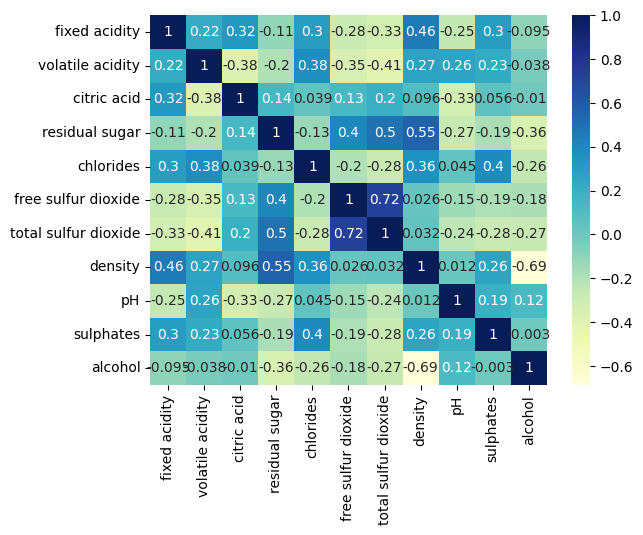

In [9]:
dataplot = sb.heatmap(X.corr(), cmap="YlGnBu", annot=True)


# Principle Component Analysis
Since we saw that there was correlation observed among a lot of variables in the data, we can say that not all variables might be necessary to cover the distribution of data.

Principle Component Analysis involves reducing the dimensions of a database while minimizing the information loss.
For detailed technical explanation
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

https://wires.onlinelibrary.wiley.com/doi/abs/10.1002/wics.101

https://www.youtube.com/watch?v=HMOI_lkzW08

In [10]:
X_pca = X

pca = PCA(n_components=7)
pca.fit(X_pca)

PCA(n_components=7)

# Explanation on "n_components"

This variable means the number of dimensions we want of the data at the end of PCA.

This parameter of PCA function is manually tunable. It means that it is not necessary that any one specific value is "best".

The more is n_components, the less will be the loss of information. Our goal should be to minimize the dimensions while also trying to minimize the information loss. This is a tradeoff, which we will better understand after this data is used to fit a model. Here, I have only arbitrarily set the value to 7. Hence the resulting data will be of 7 dimensions instead of the original 11

In [11]:
pca.components_

array([[-7.40796441e-03, -1.18432899e-03,  4.86869305e-04,
         4.10197175e-02, -1.68198717e-04,  2.30481781e-01,
         9.72166826e-01,  1.77233905e-06, -6.55520548e-04,
        -7.04338632e-04, -5.45173684e-03],
       [-5.36562393e-03, -7.84498565e-04, -2.47947037e-04,
         1.86364316e-02,  6.72674387e-05,  9.72658270e-01,
        -2.31409676e-01,  1.32996637e-06,  6.47986887e-04,
         3.46357533e-04,  2.85017390e-03],
       [ 2.37980377e-02,  8.84101767e-04,  1.92869419e-03,
         9.95274105e-01,  1.73019914e-04, -2.72149098e-02,
        -3.58290013e-02,  4.60408843e-04, -6.91161807e-03,
        -1.93529116e-03, -8.23558184e-02],
       [ 8.57756781e-01,  1.71342614e-02,  3.53280563e-02,
        -6.23231011e-02,  9.19466873e-03,  8.47350928e-03,
         4.31640540e-03,  1.41804609e-03, -3.53876123e-02,
         2.70799224e-02, -5.06621053e-01],
       [ 5.07838342e-01, -1.53591509e-02,  4.34990985e-02,
         5.87771145e-02, -6.57467616e-03,  6.06766412e-04,
  

### Checking Proportions of '0' labels to '1' labels in dataset

In [12]:
value_counts

Good         5190
Excellent    1277
Poor           30
Name: label, dtype: int64

In [13]:
n = len(y) # total samples

In [14]:
print('Percent of "poor" from total', value_counts[0]/n)
print('Percent of  "good" total', value_counts[1]/n)
print('Making sure the proportions add up to 1:')
value_counts[0]/n + value_counts[1]/n + value_counts[2]/n

Percent of "poor" from total 0.7988302293366168
Percent of  "good" total 0.19655225488687086
Making sure the proportions add up to 1:


1.0

# Trainning on 0.75% and testing on 0.25% 
Once I have gotten the metrics for this phase, the next phase starts over but instead uses 3-Fold Cross Validation. This is done to compare the results.

### Shuffling and Splitting dataset to x for the features and y for the labels

x and y will be used throughout the project
- On train test split for phase 1
- During Cross Validation to break up x and y into 3 chunks

## Split the data into trainning set and testing set

In [15]:
from sklearn.utils import shuffle
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    #random_state=0
    shuffle=True,
    stratify=y
)

The stratify parameter ensurse proportions of 0 and 1 are maintained in both training and testing set.

Making sure there is roughly the same proportion of labels as the original dataset. \
Original dataset had 8.67777 times more 0 than 1

## Hyperparameter Tuning

The hyperparameters in the random forest model are either used to increase the predictive power of the model or to make the model faster. 

| Hyperparameter    | Description
|-------------------|:----------
| n_estimators      | number of trees in the forest 
| max_features      | Sets the number of features to select when bootstrapping
| Bootstrap         | Bootstrap=True (default) samples are drawn with replacement 
| random_state      | generated random numbers for the random forest.

### Setting grid ranges

In [16]:
import math
from sklearn.metrics import f1_score, make_scorer
num_features = X.shape[1]
grid_ranges = {
    'n_estimators': [500, 1000],
    'max_features': np.arange(int(math.sqrt(num_features)/2), int(math.sqrt(num_features))*2, 1),
    'bootstrap': [True],
    'oob_score': [True],
    'random_state': [1] # for testing
}
clf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=grid_ranges,
    cv=3,
    n_jobs=-1,
    verbose=1,
)

np.arange(int(math.sqrt(num_features))/2, int(math.sqrt(num_features))*2, 1)

array([1.5, 2.5, 3.5, 4.5, 5.5])

## Fitting the Random Forest Classifier

Because we used GridSearchCV, when we fit the classifier, it will automatically do a grid search to find the best hyperparameters

In [17]:
clf.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': [500, 1000], 'oob_score': [True],
                         'random_state': [1]},
             verbose=1)

In [18]:
best_parameters = clf.best_params_
print(best_parameters)

{'bootstrap': True, 'max_features': 2, 'n_estimators': 1000, 'oob_score': True, 'random_state': 1}


## Predict with test set

In [19]:
predictions = clf.predict(X_test)

## Metrics

### Accuracy Confusion Matrix

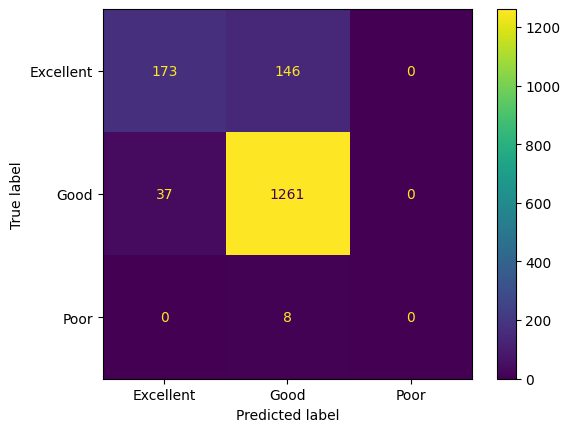

In [20]:
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

### Accuracy Score

In [21]:
print('Accuracy Score:', accuracy_score(y_test, predictions))

Accuracy Score: 0.8824615384615384


In [22]:
### Precision, Recall, f1-score

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, zero_division=0))

              precision    recall  f1-score   support

   Excellent       0.82      0.54      0.65       319
        Good       0.89      0.97      0.93      1298
        Poor       0.00      0.00      0.00         8

    accuracy                           0.88      1625
   macro avg       0.57      0.50      0.53      1625
weighted avg       0.87      0.88      0.87      1625



### Out of Bag Error - OOB

In [24]:
no_cv_oob = clf.best_estimator_.oob_score_
print('Out of Bag Score is:', no_cv_oob)
print('Out of Bag Error is:', 1 - no_cv_oob)

Out of Bag Score is: 0.8838259441707718
Out of Bag Error is: 0.11617405582922824


### ROC Curve

In [25]:
from sklearn.preprocessing import label_binarize

label_binarize(['poor', 'good'], classes=['poor', 'good', 'excellent'])

array([[1, 0, 0],
       [0, 1, 0]])

In [26]:
''' This only works with binary classification '''

'''
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
clf_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
clf_disp.plot()
'''

"\nfpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)\nroc_auc = metrics.auc(fpr, tpr)\nclf_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')\nclf_disp.plot()\n"

# Cross Validation

Now let us use Cross Validation to Split the dataset and train with 3-fold CV

## Splitting the data 3 ways

There is an awesome method in SciKit-Learn that will partition the dataset into 3 folds and at the same time maintain the proportions of 0 to 1 labels

In [27]:
''' First split the data 3 ways '''
from sklearn.model_selection import StratifiedKFold

#first_third = df.iloc[:df.shape[0]//3]
#second_third = df.iloc[df.shape[0]//3 : 2*df.shape[0]//3]
#third_third = df.iloc[df.shape[0]//3*2 : ]

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

idx = 0
folds = []
#pd.DataFrame(columns=df.columns)

print('total samples', X.shape[0])

for train_index, test_index in skf.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    #folds = pd.concat([folds, df.iloc[train_index]], axis=0)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    folds.append(data_red_and_white.iloc[test_index])
    
    #folds.append(df.iloc[x_train])

first_third   = folds[0]
second_third  = folds[1]
third_third   = folds[2]


total samples 6497


Making sure the data got split correctly:

In [28]:
print('Checking to make sure all thirds add up to the total of ', len(X))
print('sum of thirds', first_third.shape[0] + second_third.shape[0] + third_third.shape[0])

print('proportions of labels in each fold:')
print(first_third['label'].value_counts()[0]/(first_third['label'].value_counts()[0] + first_third['label'].value_counts()[1]))
print(second_third['label'].value_counts()[0]/(first_third['label'].value_counts()[0] + first_third['label'].value_counts()[1]))
print(third_third['label'].value_counts()[0]/(first_third['label'].value_counts()[0] + first_third['label'].value_counts()[1]))

Checking to make sure all thirds add up to the total of  6497
sum of thirds 6497
proportions of labels in each fold:
0.8024118738404453
0.8024118738404453
0.8024118738404453


<b>Here I am preparing the random forest classifier with a grid search so it will be ready to tune and fit</b>

In [29]:
grid_ranges = {
    'n_estimators': [500, 1000, 1500],
    'max_features': np.arange(int(math.sqrt(num_features)/2), int(math.sqrt(num_features))*2, 1),
    'bootstrap': [True],
    'oob_score': [True],
    'random_state': [1] # For reporting purposes
}
clf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=grid_ranges,
    cv=3,
    n_jobs=-1,
    verbose=1
)

## First Repetition

### Trainning on first Two-folds

In [30]:
''' Trainning on First Two Folds '''
x_train = pd.concat([first_third, second_third]).drop(['label', 'quality'], axis=1)
y_train = pd.concat([first_third, second_third])['label']
clf.fit(X_train , y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': [500, 1000, 1500], 'oob_score': [True],
                         'random_state': [1]},
             verbose=1)

In [31]:
clf.best_params_

{'bootstrap': True,
 'max_features': 1,
 'n_estimators': 1000,
 'oob_score': True,
 'random_state': 1}

### Testing on 3rd Fold

In [32]:
first_predictions = clf.predict(third_third.drop(['label', 'quality'], axis=1))

### Metrics

#### Confusion Matrix

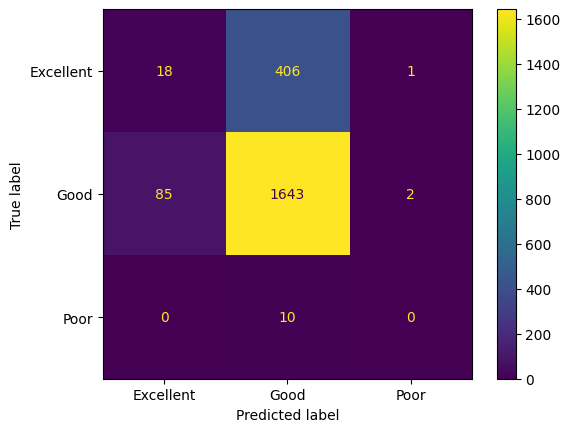

In [33]:
cm = confusion_matrix(third_third['label'], first_predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

#### Accuracy Score

In [34]:
first_accuracy_score = accuracy_score(first_predictions, third_third['label'])
print('Accuracy Score', first_accuracy_score)

Accuracy Score 0.7672055427251732


#### Precision, Recall, f1-score

In [35]:
from sklearn.metrics import classification_report
print(classification_report(third_third['label'], first_predictions))

              precision    recall  f1-score   support

   Excellent       0.17      0.04      0.07       425
        Good       0.80      0.95      0.87      1730
        Poor       0.00      0.00      0.00        10

    accuracy                           0.77      2165
   macro avg       0.32      0.33      0.31      2165
weighted avg       0.67      0.77      0.71      2165



We can see that the matrix incorrectly classified 3 samples. All of the misclassifications were False Negatives. This will affect the recall because the classifier is missing there instances of positive samples for 1.

#### Out of Bag Error

In [36]:
first_oob = clf.best_estimator_.oob_score_
first_oob

0.7700831024930748

#### ROC Curve

### ROC Curve

In [37]:
# hard to make sense of fpr tpr with multiclass data
'''
fpr, tpr, thresholds = metrics.roc_curve(third_third['label'], first_predictions)
roc_auc = metrics.auc(fpr, tpr)
clf_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
clf_disp.plot()
'''

"\nfpr, tpr, thresholds = metrics.roc_curve(third_third['label'], first_predictions)\nroc_auc = metrics.auc(fpr, tpr)\nclf_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')\nclf_disp.plot()\n"

## Second Repetition

### Trainning on first and third fold

In [38]:
''' Trainning on First and Third Folds, clf.fit also includes a new grid search for hyperparameters'''
x_train = pd.concat([first_third, third_third]).drop(['label', 'quality'], axis=1)
y_train = pd.concat([first_third, third_third])['label']
clf.fit(x_train, y_train) # fitting again untrains previous fit which is what we want

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': [500, 1000, 1500], 'oob_score': [True],
                         'random_state': [1]},
             verbose=1)

In [39]:
clf.best_params_

{'bootstrap': True,
 'max_features': 5,
 'n_estimators': 1500,
 'oob_score': True,
 'random_state': 1}

### Testing on 2nd Fold

In [40]:
second_predictions = clf.predict(second_third.drop(['label', 'quality'], axis=1))

### Metrics

#### Confusion Matrix

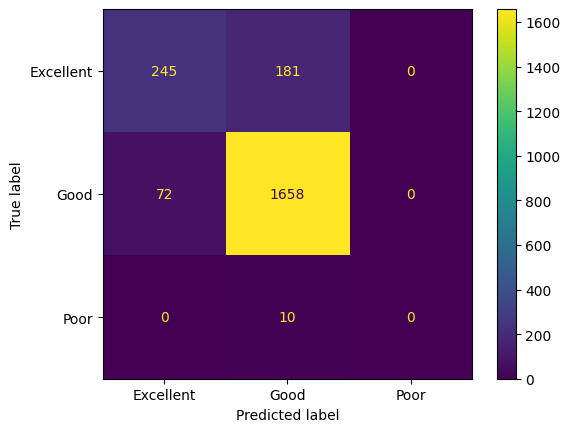

In [41]:
cm = confusion_matrix(second_third['label'], second_predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

#### Accuracy Score

In [42]:
second_accuracy_score = accuracy_score(second_predictions, second_third['label'])
print('accuracy_score', second_accuracy_score)

accuracy_score 0.8785780240073869


#### Precision, Recall, f1-score

In [43]:
from sklearn.metrics import classification_report
print(classification_report(second_third['label'], second_predictions))

              precision    recall  f1-score   support

   Excellent       0.77      0.58      0.66       426
        Good       0.90      0.96      0.93      1730
        Poor       0.00      0.00      0.00        10

    accuracy                           0.88      2166
   macro avg       0.56      0.51      0.53      2166
weighted avg       0.87      0.88      0.87      2166



/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We can see that the matrix incorrectly classified 6 samples. All of the misclassifications were False Negatives. This will affect the recall because the classifier is missing there instances of positive samples for 1.

#### Out of Bag Error

In [44]:
second_oob = clf.best_estimator_.oob_score_
second_oob_eeror = 1 - second_oob
print('The oob score is:', second_oob)
print('The OOB error is:', second_oob_eeror)

The oob score is: 0.8787808820133918
The OOB error is: 0.12121911798660823


### ROC Curve

In [45]:
'''
fpr, tpr, thresholds = metrics.roc_curve(second_third['label'], second_predictions)
roc_auc = metrics.auc(fpr, tpr)
clf_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
clf_disp.plot()
'''

"\nfpr, tpr, thresholds = metrics.roc_curve(second_third['label'], second_predictions)\nroc_auc = metrics.auc(fpr, tpr)\nclf_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')\nclf_disp.plot()\n"

## Third Repetition

### Trainning on second and third fold

In [46]:
''' Trainning on last Two Folds '''
x_train = pd.concat([second_third, third_third]).drop(['label', 'quality'], axis=1)
y_train = pd.concat([second_third, third_third])['label']
clf.fit(x_train , y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': [500, 1000, 1500], 'oob_score': [True],
                         'random_state': [1]},
             verbose=1)

In [47]:
clf.best_params_

{'bootstrap': True,
 'max_features': 2,
 'n_estimators': 500,
 'oob_score': True,
 'random_state': 1}

### Testing on 1st Fold

In [48]:
third_predictions = clf.predict(first_third.drop(['label', 'quality'], axis=1))

### Metrics

#### Confusion Matrix

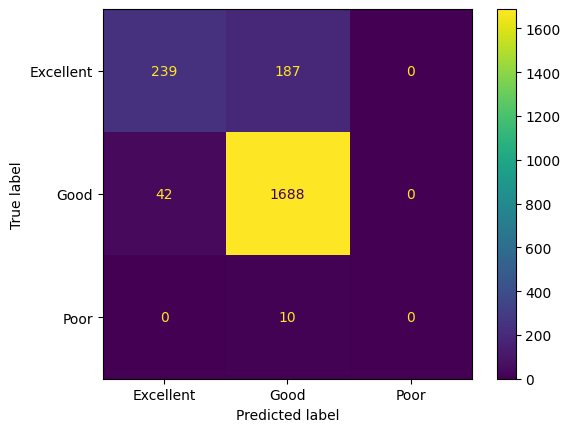

In [49]:
cm = confusion_matrix(first_third['label'], third_predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

#### Accuracy Score

In [50]:
third_accuracy_score = accuracy_score(third_predictions, first_third['label'])
print('Accuracy Score', third_accuracy_score)

Accuracy Score 0.8896583564173592


#### Precision, Recall, f1-score

In [51]:
from sklearn.metrics import classification_report
print(classification_report(first_third['label'], third_predictions, zero_division=0))

              precision    recall  f1-score   support

   Excellent       0.85      0.56      0.68       426
        Good       0.90      0.98      0.93      1730
        Poor       0.00      0.00      0.00        10

    accuracy                           0.89      2166
   macro avg       0.58      0.51      0.54      2166
weighted avg       0.88      0.89      0.88      2166



We can see that the matrix incorrectly classified 6 samples. All of the misclassifications were False Negatives. This will affect the recall because the classifier is missing there instances of positive samples for 1.

In [52]:
third_oob = clf.best_estimator_.oob_score_
print('The OOB score is:', third_oob)
print('The OOB Error is :,', 1 - third_oob)

The OOB score is: 0.8773955206649734
The OOB Error is :, 0.1226044793350266


### ROC Curve

In [53]:
'''
fpr, tpr, thresholds = metrics.roc_curve(first_third['label'], third_predictions)
roc_auc = metrics.auc(fpr, tpr)
clf_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
clf_disp.plot()
'''

"\nfpr, tpr, thresholds = metrics.roc_curve(first_third['label'], third_predictions)\nroc_auc = metrics.auc(fpr, tpr)\nclf_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')\nclf_disp.plot()\n"

## Metrics of all Three folds

### Average Accuracy Score

In [54]:
average_accuracy = (first_accuracy_score + second_accuracy_score + third_accuracy_score)/3
print('Average Accuracy', average_accuracy)

Average Accuracy 0.8451473077166399


### Average OOB Score vs No CV OOB Score

In [55]:
average_oob = (first_oob + second_oob + third_oob)/3
print('Average oob of all 3 folds:', average_oob)
print('Average oob when trained on entire dataset:', no_cv_oob)
print('Wow! They are very similar! This shows that RF has built in CV')

Average oob of all 3 folds: 0.8420865017238133
Average oob when trained on entire dataset: 0.8838259441707718
Wow! They are very similar! This shows that RF has built in CV


# Using Best Trained Random Forest

I will use the OOB to select the best trained RF out of the three

In [56]:
print('first_oob,', first_oob)
print('second_oob,', second_oob)
print('third_oob,', third_oob)
print('Looks like third RF has best OOB so we will select that one \
to do a runtime test and feature ranking')
best_oob = max(first_oob, second_oob, third_oob)

first_oob, 0.7700831024930748
second_oob, 0.8787808820133918
third_oob, 0.8773955206649734
Looks like third RF has best OOB so we will select that one to do a runtime test and feature ranking


## Best Parameters for the Best RF

In [57]:
clf.best_params_

{'bootstrap': True,
 'max_features': 2,
 'n_estimators': 500,
 'oob_score': True,
 'random_state': 1}

### Cut Off (I am keeping it at 0.5)
- Change the cutoff from anyhwere to 0 and 1
- The model should be already trained and is the variable 'model'
- The default value is 0.5

In [58]:
cutoff = 0.5
y_pred_threshold = (clf.predict_proba(X_train)[:, 1] > cutoff).astype('float')
# Confusion Matrix of the results with change in cutoff
#confusion_matrix(y_test, y_pred_threshold)

### Taking a single positive and negative sample

## Negative Sample

In [59]:
index = 0 # index of sample to predict
single_sample = [X_test.iloc[index].to_numpy()]

In [60]:
%%time
with warnings.catch_warnings(record=True):
    single_predict = clf.predict(single_sample)

CPU times: user 54 ms, sys: 3.09 ms, total: 57.1 ms
Wall time: 69.5 ms


In [61]:
print('predicted:', single_predict[0], ' actual', y_train.iloc[index])

predicted: Good  actual Good


## Positive Sample

In [63]:
index = 11# index of sample to predict
single_sample = [X_test.iloc[index].to_numpy()]

In [64]:
%%time
with warnings.catch_warnings(record=True):
    single_predict = clf.predict(single_sample)

CPU times: user 52.4 ms, sys: 7.93 ms, total: 60.3 ms
Wall time: 77.9 ms


In [65]:
print('predicted:', single_predict[0], ' actual', first_third['label'].iloc[index])

predicted: Good  actual Excellent


## Feature Ranking

In [66]:
''' First extracting feature rankings and standardizing '''
# Standardize Importances
#std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
std = clf.best_estimator_.feature_importances_
feature_names = list(x_train.columns)
features_dict = {key: val for key, val in zip(feature_names, std)}
feature_rankings = {k: v for k, v in sorted(features_dict.items(), key=lambda item: item[1], reverse=True)}
feature_rankings_list = list(feature_rankings.items())

## Plotting the Feature Ranking of top 10

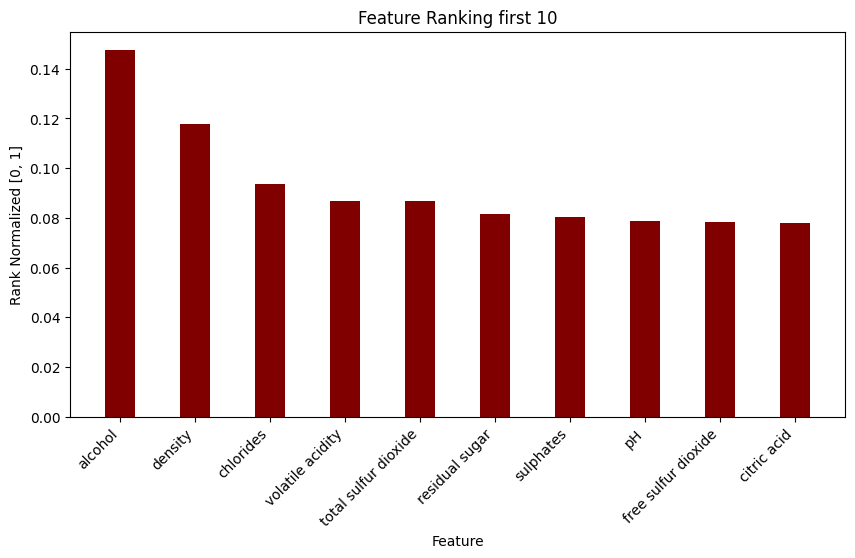

In [67]:
import matplotlib.pyplot as plt

# number of features to compare

n = 10
target_features = feature_rankings_list[:n]
feature_names = [tup[0] for tup in target_features]
feature_values = [tup[1] for tup in target_features]

fig = plt.figure(figsize = (10, 5))

plt.xticks(rotation=45, ha='right')

# creating the bar plot
plt.bar(feature_names, feature_values, color ='maroon',
        width = 0.4)

plt.xlabel('Feature')
plt.ylabel('Rank Normalized [0, 1]')
plt.title(f'Feature Ranking first {n}')

plt.show()
           

# References

https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold